<a href="https://colab.research.google.com/github/stkchan/projects/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data set from https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

# **Import Libraries**

In [ ]:
#Import libralies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Check version of Python
version = sys.version
print(f"Python current version is {version}")

Python current version is 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


# **Import dataset**

In [ ]:
#Import dataset
path = "/content/sample_data/CAR DETAILS FROM CAR DEKHO.csv"
df_original = pd.read_csv(path)
df_original.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1497,Tata Indica Vista Aqua 1.3 Quadrajet,2011,160000,80000,Diesel,Individual,Manual,Second Owner
3353,Honda WR-V i-VTEC VX,2017,700000,25552,Petrol,Dealer,Manual,Second Owner
1229,Hyundai i20 Active S Petrol,2016,535000,55838,Petrol,Dealer,Manual,First Owner
1546,Hyundai Santro Magna AMT BSIV,2019,475000,10000,Petrol,Individual,Automatic,First Owner
139,Hyundai EON Era Plus,2015,200000,70000,Petrol,Individual,Manual,First Owner


In [ ]:
#copy data
df = df_original.copy()

In [ ]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#checking the number of rows and columns
print(f"total rows of data = {df.shape[0]} rows")
print(f"total columns of data = {df.shape[1]} columns")

total rows of data = 4340 rows
total columns of data = 8 columns


In [ ]:
#checking basic statistics
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
#checking the number of missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#checking the number of unique values
df.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

# **Explore data before cleanning**

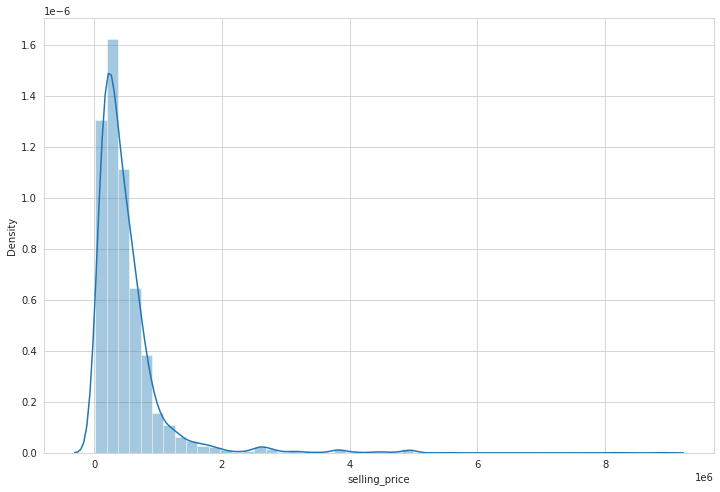

In [ ]:
#plot to checking distribution of selling price
sns.set_style("whitegrid")
plt.figure(figsize = (12, 8))
sns.distplot(df["selling_price"]);

In [ ]:
#skewness and kurtosis
print(f"skewness: %f" % df["selling_price"].skew())
print(f"kurtosis: %f" % df["selling_price"].kurt())

skewness: 4.892021
kurtosis: 37.087543


In [ ]:
def plot_boxplot(df, column):
    outlier = [column]
    plt.figure(figsize = (10, 8))
    sns.set_style("whitegrid")
    sns.boxplot(data = df[outlier], orient = "v", saturation = 1, palette = "Set2", whis = 1.5, width = 0.9);
    plt.title("Outlier Variable Distribution", fontweight = "bold", fontsize = 15)

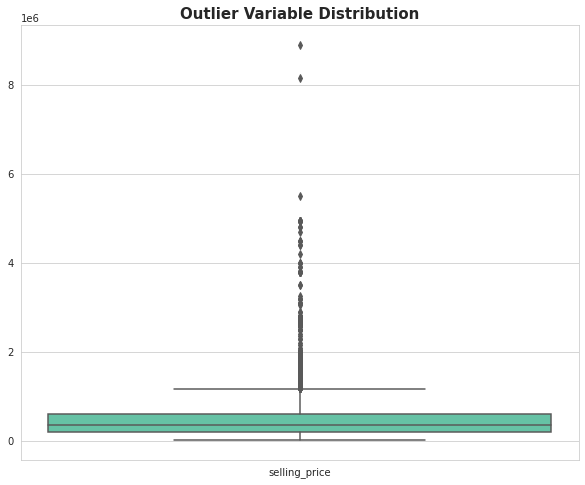

In [ ]:
#There are 2 point of outlier ?
plot_boxplot(df, "selling_price")

In [ ]:
# There are 2 outlier
df["selling_price"].to_frame().sort_values(by = "selling_price", ascending = False)

,selling_price
3872,8900000
89,8150000
3969,5500000
2258,4950000
612,4950000
...,...
2849,35000
1832,35000
2444,30000
2495,22000


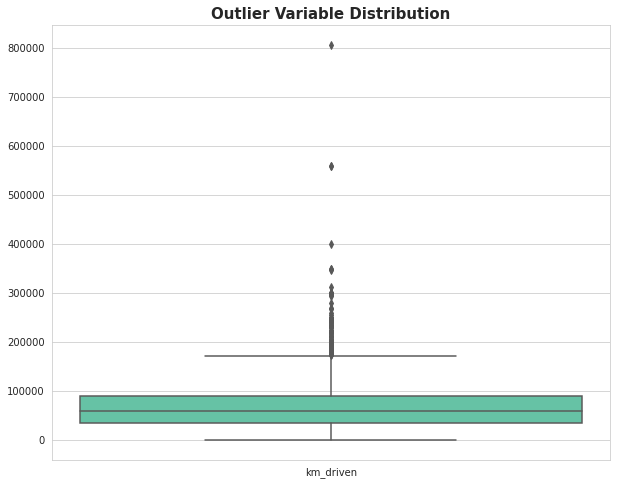

In [ ]:
# 1 outlier of km_driven
plot_boxplot(df, "km_driven")

In [ ]:
df["km_driven"].to_frame().sort_values(by = "km_driven", ascending = False)

,km_driven
1243,806599
4184,560000
525,560000
3679,400000
2394,350000
...,...
3703,1000
1715,101
1716,101
1714,101


In [ ]:
#Count values
print(df["name"].value_counts())
print("\n")
print(df["fuel"].value_counts())
print("\n")
print(df["seller_type"].value_counts())
print("\n")
print(df["transmission"].value_counts())
print("\n")
print(df["owner"].value_counts())

Maruti Swift Dzire VDI      69
Maruti Alto 800 LXI         59
Maruti Alto LXi             47
Maruti Alto LX              35
Hyundai EON Era Plus        35
                            ..
Hyundai Getz 1.3 GVS         1
Honda City i VTEC S          1
Hyundai Verna 1.4 EX         1
Tata Sumo SE Plus BSIII      1
Mahindra Scorpio S5 BSIV     1
Name: name, Length: 1491, dtype: int64


Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64


Manual       3892
Automatic     448
Name: transmission, dtype: int64


First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


# **Cleaning Data**

In [ ]:
#Change columns name
df = df.rename({"name" : "car_name", "selling_price" : "price"}, axis = 1)
df.sample(5)

,car_name,year,price,km_driven,fuel,seller_type,transmission,owner
1640,Maruti Wagon R VXI BSIII,2005,80000,40000,Petrol,Individual,Manual,Second Owner
1594,Hyundai Accent GLE CNG,2010,145000,90000,CNG,Individual,Manual,Second Owner
2758,Tata Manza Aura Safire BS IV,2013,200000,60000,Petrol,Individual,Manual,First Owner
2023,Maruti Alto 800 LXI,2018,300000,16584,Petrol,Dealer,Manual,First Owner
3810,Nissan Terrano XL Plus 85 PS,2015,530000,55000,Diesel,Dealer,Manual,First Owner


In [ ]:
#create new column
df["age_car"] = 2020 - df["year"]
#drop column "year"
df = df.drop(["year"], axis = 1)
df.sample(5)

,car_name,price,km_driven,fuel,seller_type,transmission,owner,age_car
277,Hyundai i20 Asta (o),300000,50000,Petrol,Individual,Manual,First Owner,11
883,Maruti Alto LXi,140000,80000,Petrol,Individual,Manual,Second Owner,11
4139,Maruti S-Cross Alpha DDiS 200 SH,950000,30000,Diesel,Individual,Manual,First Owner,2
3409,Hyundai EON Era Plus,160000,80000,Petrol,Individual,Manual,First Owner,7
1756,Maruti Eeco 7 Seater Standard BSIV,325000,39093,Petrol,Dealer,Manual,First Owner,6


In [ ]:
#split values in column "car_name"
df["car_name"] = df["car_name"].str.split(" ", expand = True)
df.sample(5)

,car_name,price,km_driven,fuel,seller_type,transmission,owner,age_car
3136,Maruti,120000,50000,Petrol,Individual,Manual,First Owner,8
441,Mahindra,500000,72104,Diesel,Dealer,Manual,Second Owner,7
2629,Chevrolet,180000,55130,Diesel,Dealer,Manual,First Owner,8
1418,Maruti,140000,100000,Petrol,Individual,Manual,Second Owner,13
4194,Tata,570000,5000,Petrol,Individual,Manual,First Owner,2


In [ ]:
df["car_name"].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Datsun             37
Fiat               37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Isuzu               1
Force               1
Kia                 1
Daewoo              1
Name: car_name, dtype: int64

In [ ]:
#Change column with object type to category
df["car_name"] = df["car_name"].astype('category')
df["fuel"] = df["fuel"].astype('category')
df["seller_type"] = df["seller_type"].astype('category')
df["transmission"] = df["transmission"].astype('category')
df["owner"] = df["owner"].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   car_name      4340 non-null   category
 1   price         4340 non-null   int64   
 2   km_driven     4340 non-null   int64   
 3   fuel          4340 non-null   category
 4   seller_type   4340 non-null   category
 5   transmission  4340 non-null   category
 6   owner         4340 non-null   category
 7   age_car       4340 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 125.1 KB


In [ ]:
df = df[["price", "km_driven", "car_name", "fuel", "seller_type", "transmission", "owner", "age_car"]]
df.head()

,price,km_driven,car_name,fuel,seller_type,transmission,owner,age_car
0,60000,70000,Maruti,Petrol,Individual,Manual,First Owner,13
1,135000,50000,Maruti,Petrol,Individual,Manual,First Owner,13
2,600000,100000,Hyundai,Diesel,Individual,Manual,First Owner,8
3,250000,46000,Datsun,Petrol,Individual,Manual,First Owner,3
4,450000,141000,Honda,Diesel,Individual,Manual,Second Owner,6


# **Kill Outlier with IQR**

In [ ]:
# Define function called 'outlier' which returns a list of index outliers
# IQR = Q3 - Q1
# +/- 1.5 * IQR
def clean_outlier(data, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(data[col] < lower_bound) | (data[col] > upper_bound)]

    return ls

In [ ]:
#create an empty list to store the output
index_list = []
for cols in ["price", "km_driven"]:
    index_list.extend(clean_outlier(df, cols))

In [ ]:
index_list

In [ ]:
#define a function called "remove"
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [ ]:
df_cleaned = remove(df, index_list)

In [ ]:
print(df.shape) #Data before cleaning outlier
print(df_cleaned.shape) #Data after cleaning outlier

(4340, 8)
(3962, 8)


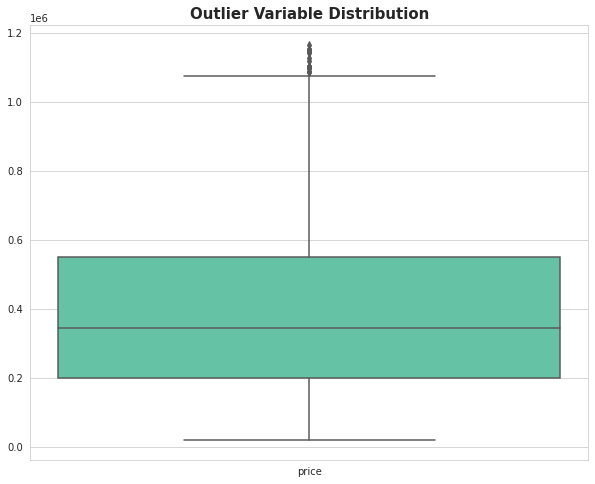

In [ ]:
plot_boxplot(df_cleaned, "price")

In [ ]:
df_cleaned["price"].to_frame().sort_values(by = "price", ascending = False)

,price
3615,1165000
4052,1151000
2062,1150000
3207,1150000
2578,1150000
...,...
1832,35000
3206,35000
2444,30000
2495,22000


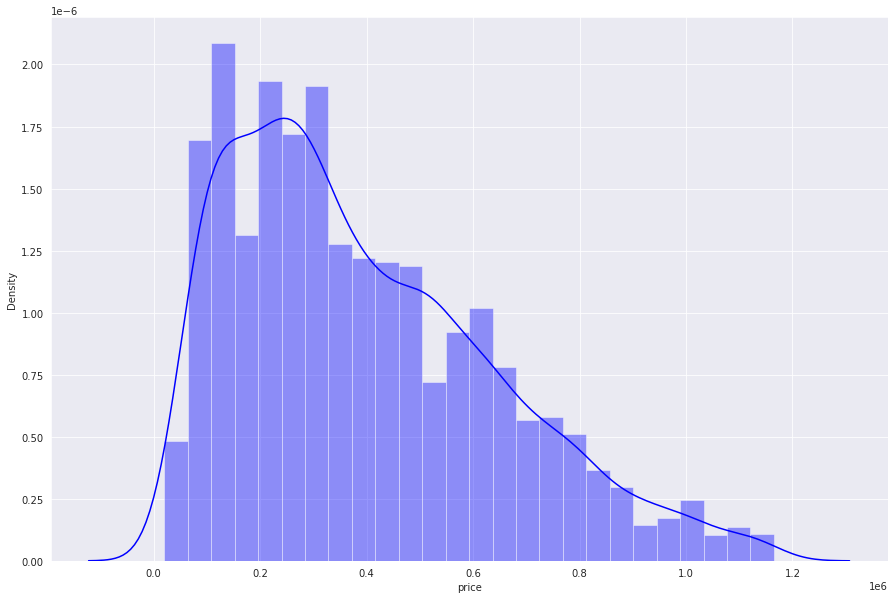

In [ ]:
plt.figure(figsize = (15, 10))
sns.set_style("darkgrid")
sns.distplot(df_cleaned["price"], color = "b");

In [ ]:
#Current skewness and kurtosis
print(f"skewness: %f" % df_cleaned["price"].skew())
print(f"kurtosis: %f" % df_cleaned["price"].kurt())

skewness: 0.781908
kurtosis: -0.030200


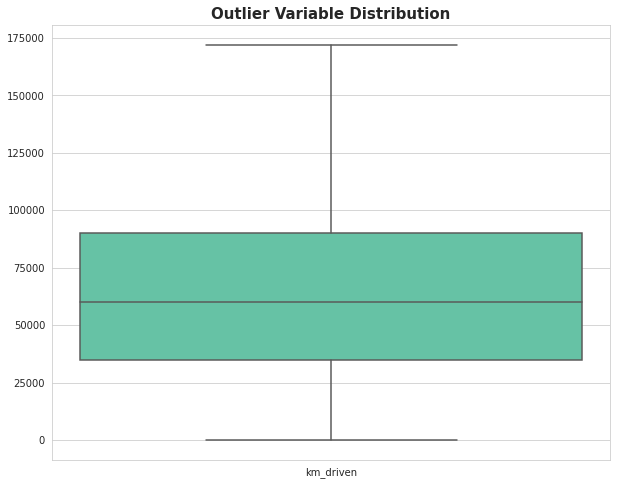

In [ ]:
plot_boxplot(df_cleaned, "km_driven")

In [ ]:
#There is 1 km_driven
df_cleaned["km_driven"].to_frame().sort_values(by = "km_driven", ascending = False)

,km_driven
636,172000
1772,170000
4271,170000
2160,170000
2155,170000
...,...
1833,1000
1716,101
1715,101
1714,101


In [ ]:
#drop a row with 1 km_driven value
df_cleaned = df_cleaned.drop(index = df_cleaned[df_cleaned["km_driven"] == 1].index)

# **Exploratory Data Analysis**

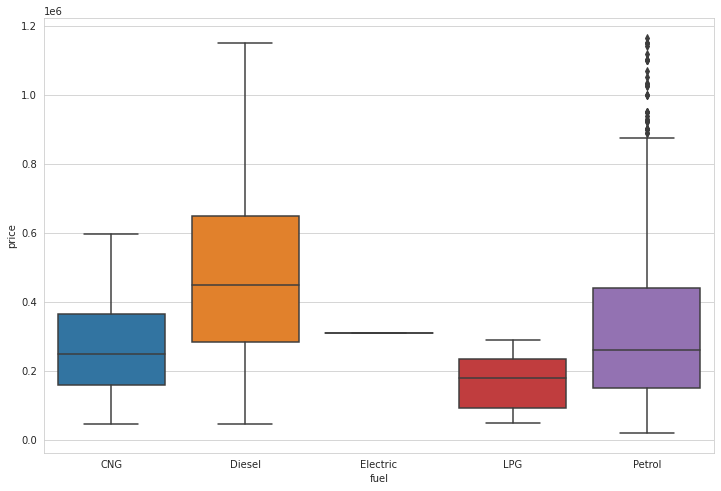

In [ ]:
var = 'fuel'
data = pd.concat([df_cleaned["price"], df_cleaned[var]], axis = 1)
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.boxplot(x = var,
                  y = "price",
                  data = data)

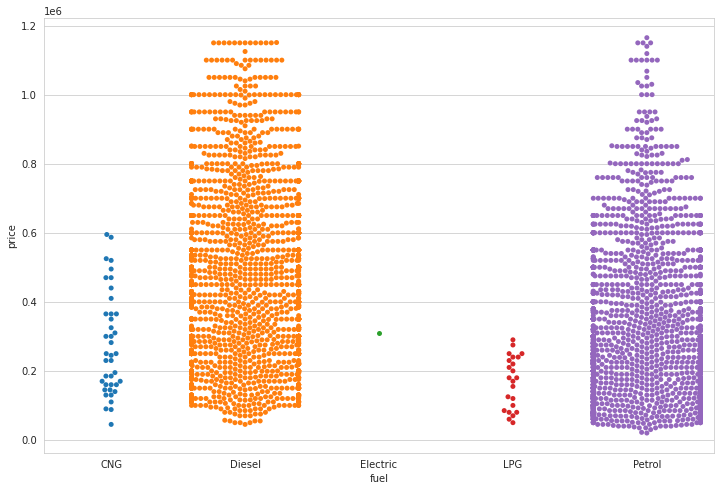

In [ ]:
var = 'fuel'
data = pd.concat([df_cleaned["price"], df_cleaned[var]], axis = 1)
f, ax = plt.subplots(figsize = (12, 8))
fig = sns.swarmplot(x = var,
                  y = "price",
                  data = data)

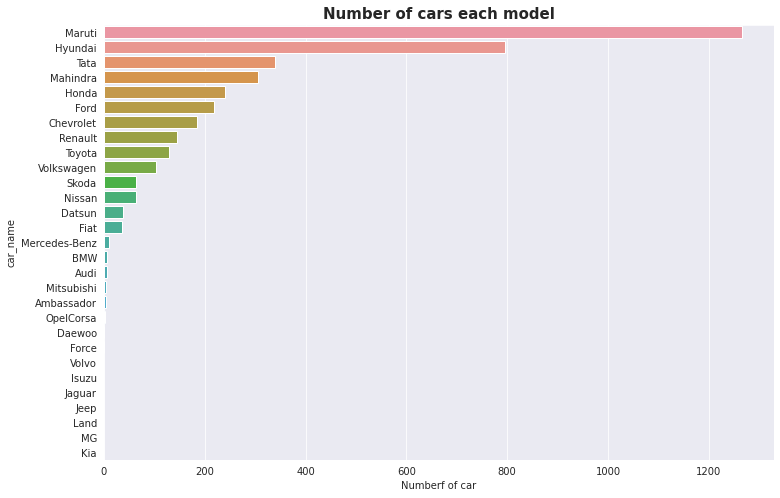

In [ ]:
plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
sns.countplot(y = 'car_name',
              data = df_cleaned,
              order = df_cleaned['car_name'].value_counts().index)
plt.xlabel("Numberf of car")
plt.title("Number of cars each model", fontweight = 'bold', fontsize = 15)
plt.show()

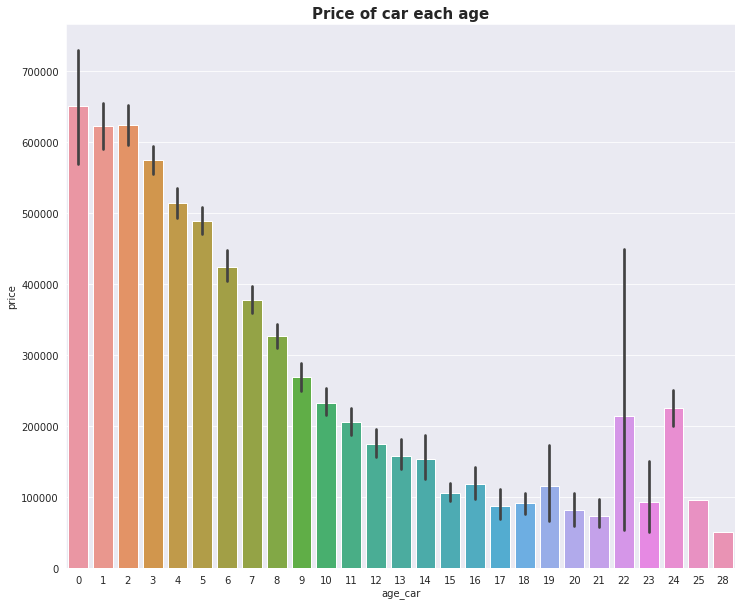

In [ ]:
plt.figure(figsize = (12, 10))
sns.barplot(x = "age_car", 
            y = "price",
            data = df_cleaned)
plt.title("Price of car each age", fontweight = "bold", fontsize = 15);

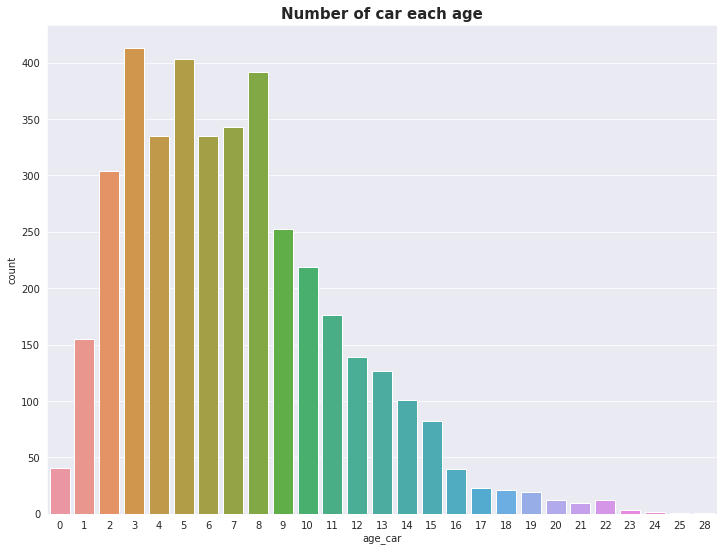

In [ ]:
plt.figure(figsize=(12, 9))
sns.set_style("darkgrid")
sns.countplot('age_car', data = df_cleaned)
plt.title("Number of car each age",fontweight = "bold", fontsize = 15);

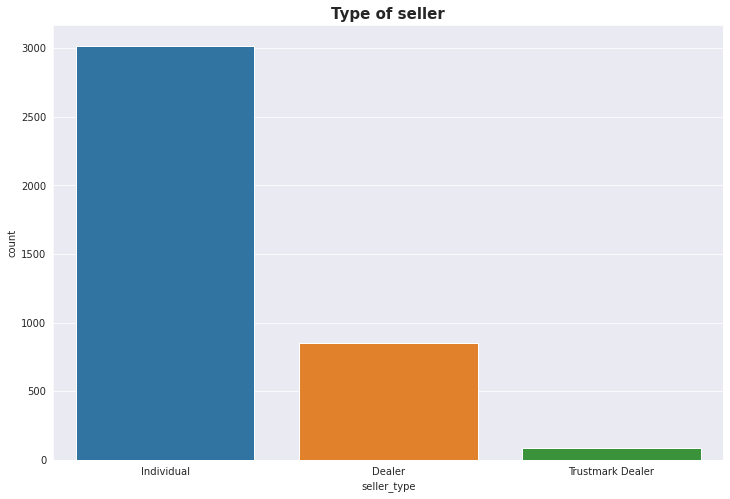

In [ ]:
plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
sns.countplot(x = 'seller_type', 
              data = df_cleaned,
              order = df_cleaned['seller_type'].value_counts().to_frame().index)
plt.title("Type of seller", fontweight = 'bold', fontsize = 15);

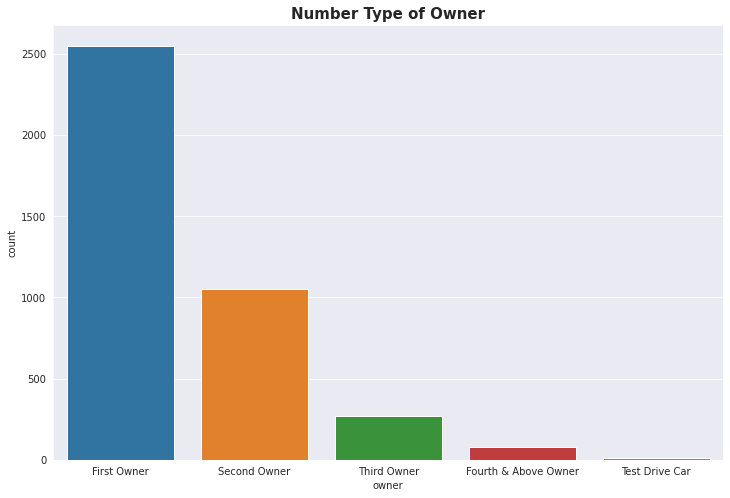

In [ ]:
plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
sns.countplot(x = 'owner', 
              data = df_cleaned,
              order = df_cleaned["owner"].value_counts().to_frame().index)
plt.title("Number Type of Owner", fontweight = 'bold', fontsize = 15);

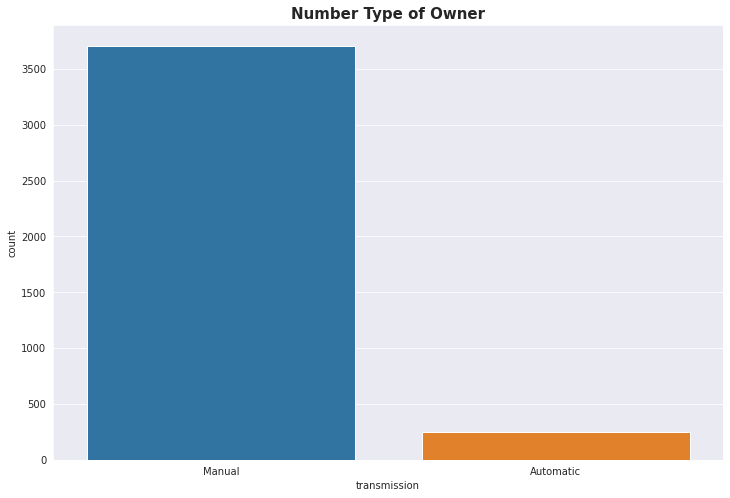

In [ ]:
plt.figure(figsize = (12, 8))
sns.set_style('darkgrid')
sns.countplot(x = 'transmission', 
              data = df_cleaned,
              order = df_cleaned["transmission"].value_counts().to_frame().index)
plt.title("Number Type of Owner", fontweight = 'bold', fontsize = 15);

# **OneHot Encoding with LabelEncoder -----  data_cleaned**

In [ ]:
#Import library for LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
lab = LabelEncoder()
df_cleaned["car_name"] = lab.fit_transform(df_cleaned["car_name"])
df_cleaned["fuel"] = lab.fit_transform(df_cleaned["fuel"])
df_cleaned["seller_type"] = lab.fit_transform(df_cleaned["seller_type"])
df_cleaned["transmission"] = lab.fit_transform(df_cleaned["transmission"])
df_cleaned["owner"] = lab.fit_transform(df_cleaned["owner"])

In [ ]:
df_cleaned.sample(5)

,price,km_driven,car_name,fuel,seller_type,transmission,owner,age_car
3389,220000,90000,19,1,1,1,2,12
2385,195000,57000,3,1,0,1,2,11
1035,825000,11212,12,4,2,0,0,2
4316,500000,82000,15,1,1,1,0,6
710,415000,32670,12,4,0,0,0,3


In [ ]:
print(f"Number rows : {df_cleaned.shape[0]}")
print(f"Number columns : {df_cleaned.shape[1]}")

Number rows : 4068
Number columns : 8


# **OneHot Encoding with pd.get_dummies**

In [ ]:
df_hot = pd.get_dummies(df_cleaned)
df_hot.head()

,price,km_driven,age_car,car_name_Ambassador,car_name_Audi,car_name_BMW,car_name_Chevrolet,car_name_Daewoo,car_name_Datsun,car_name_Fiat,car_name_Force,car_name_Ford,car_name_Honda,car_name_Hyundai,car_name_Isuzu,car_name_Jaguar,car_name_Jeep,car_name_Kia,car_name_Land,car_name_MG,car_name_Mahindra,car_name_Maruti,car_name_Mercedes-Benz,car_name_Mitsubishi,car_name_Nissan,car_name_OpelCorsa,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,135000,50000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,600000,100000,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,250000,46000,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,450000,141000,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


# **Normalize**

In [ ]:
#Import library
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizer = MinMaxScaler()

In [ ]:
df_normalize = normalizer.fit_transform(df_cleaned)
df_normalize = pd.DataFrame(df_normalize, columns = df_cleaned.columns)

In [ ]:
df_normalize

,price,km_driven,car_name,fuel,seller_type,transmission,owner,age_car
0,0.034934,0.086670,0.571429,1.00,0.5,1.0,0.0,0.464286
1,0.100437,0.061871,0.571429,1.00,0.5,1.0,0.0,0.464286
2,0.506550,0.123868,0.476190,0.25,0.5,1.0,0.0,0.285714
3,0.200873,0.056911,0.238095,1.00,0.5,1.0,0.0,0.107143
4,0.375546,0.174705,0.428571,0.25,0.5,1.0,0.5,0.214286
...,...,...,...,...,...,...,...,...
4063,0.340610,0.099069,0.476190,0.25,0.5,1.0,0.5,0.214286
4064,0.340610,0.099069,0.476190,0.25,0.5,1.0,0.5,0.214286
4065,0.078603,0.102789,0.571429,1.00,0.5,1.0,0.5,0.392857
4066,0.737991,0.111468,0.476190,0.25,0.5,1.0,0.0,0.142857


# **Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standardize_data = StandardScaler()

In [ ]:
df_stand = standardize_data.fit_transform(df_hot)
df_stand = pd.DataFrame(df_stand, columns = df_hot.columns)

In [ ]:
df_stand

,price,km_driven,age_car,car_name_Ambassador,car_name_Audi,car_name_BMW,car_name_Chevrolet,car_name_Daewoo,car_name_Datsun,car_name_Fiat,car_name_Force,car_name_Ford,car_name_Honda,car_name_Hyundai,car_name_Isuzu,car_name_Jaguar,car_name_Jeep,car_name_Kia,car_name_Land,car_name_MG,car_name_Mahindra,car_name_Maruti,car_name_Mercedes-Benz,car_name_Mitsubishi,car_name_Nissan,car_name_OpelCorsa,car_name_Renault,car_name_Skoda,car_name_Tata,car_name_Toyota,car_name_Volkswagen,car_name_Volvo,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,-1.341447,0.192016,1.407981,-0.031794,-0.03895,-0.03895,-0.220717,-0.015891,-0.097104,-0.09577,-0.015891,-0.241919,-0.254529,-0.501499,0.0,0.0,0.0,0.0,0.0,0.0,-0.288833,1.459872,-0.050309,-0.035551,-0.12713,-0.022476,-0.194931,-0.12713,-0.305933,-0.183477,-0.164207,0.0,-0.101002,-0.920120,-0.015891,-0.076423,0.95048,-0.524665,0.559369,-0.15161,-0.26121,0.26121,0.743454,-0.139866,-0.600973,-0.059557,-0.269926
1,-1.039630,-0.360312,1.407981,-0.031794,-0.03895,-0.03895,-0.220717,-0.015891,-0.097104,-0.09577,-0.015891,-0.241919,-0.254529,-0.501499,0.0,0.0,0.0,0.0,0.0,0.0,-0.288833,1.459872,-0.050309,-0.035551,-0.12713,-0.022476,-0.194931,-0.12713,-0.305933,-0.183477,-0.164207,0.0,-0.101002,-0.920120,-0.015891,-0.076423,0.95048,-0.524665,0.559369,-0.15161,-0.26121,0.26121,0.743454,-0.139866,-0.600973,-0.059557,-0.269926
2,0.831639,1.020508,0.225308,-0.031794,-0.03895,-0.03895,-0.220717,-0.015891,-0.097104,-0.09577,-0.015891,-0.241919,-0.254529,1.994024,0.0,0.0,0.0,0.0,0.0,0.0,-0.288833,-0.684992,-0.050309,-0.035551,-0.12713,-0.022476,-0.194931,-0.12713,-0.305933,-0.183477,-0.164207,0.0,-0.101002,1.086815,-0.015891,-0.076423,-1.05210,-0.524665,0.559369,-0.15161,-0.26121,0.26121,0.743454,-0.139866,-0.600973,-0.059557,-0.269926
3,-0.576843,-0.470778,-0.957365,-0.031794,-0.03895,-0.03895,-0.220717,-0.015891,10.298255,-0.09577,-0.015891,-0.241919,-0.254529,-0.501499,0.0,0.0,0.0,0.0,0.0,0.0,-0.288833,-0.684992,-0.050309,-0.035551,-0.12713,-0.022476,-0.194931,-0.12713,-0.305933,-0.183477,-0.164207,0.0,-0.101002,-0.920120,-0.015891,-0.076423,0.95048,-0.524665,0.559369,-0.15161,-0.26121,0.26121,0.743454,-0.139866,-0.600973,-0.059557,-0.269926
4,0.228004,2.152781,-0.247761,-0.031794,-0.03895,-0.03895,-0.220717,-0.015891,-0.097104,-0.09577,-0.015891,-0.241919,3.928827,-0.501499,0.0,0.0,0.0,0.0,0.0,0.0,-0.288833,-0.684992,-0.050309,-0.035551,-0.12713,-0.022476,-0.194931,-0.12713,-0.305933,-0.183477,-0.164207,0.0,-0.101002,1.086815,-0.015891,-0.076423,-1.05210,-0.524665,0.559369,-0.15161,-0.26121,0.26121,-1.345072,-0.139866,1.663969,-0.059557,-0.269926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,0.067031,0.468180,-0.247761,-0.031794,-0.03895,-0.03895,-0.220717,-0.015891,-0.097104,-0.09577,-0.015891,-0.241919,-0.254529,1.994024,0.0,0.0,0.0,0.0,0.0,0.0,-0.288833,-0.684992,-0.050309,-0.035551,-0.12713,-0.022476,-0.194931,-0.12713,-0.305933,-0.183477,-0.164207,0.0,-0.101002,1.086815,-0.015891,-0.076423,-1.05210,-0.524665,0.559369,-0.15161,-0.26121,0.26121,-1.345072,-0.139866,1.663969,-0.059557,-0.269926
3957,0.067031,0.468180,-0.247761,-0.031794,-0.03895,-0.03895,-0.220717,-0.015891,-0.097104,-0.09577,-0.015891,-0.241919,-0.254529,1.994024,0.0,0.0,0.0,0.0,0.0,0.0,-0.288833,-0.684992,-0.050309,-0.035551,-0.12713,-0.022476,-0.194931,-0.12713,-0.305933,-0.183477,-0.164207,0.0,-0.101002,1.086815,-0.015891,-0.076423,-1.05210,-0.524665,0.559369,-0.15161,-0.26121,0.26121,-1.345072,-0.139866,1.663969,-0.059557,-0.269926
3958,-1.140236,0.551029,0.934912,-0.031794,-0.03895,-0.03895,-0.220717,-0.015891,-0.097104,-0.09577,-0.015891,-0.241919,-0.254529,-0.5014

# **Correlation & Heatmap**

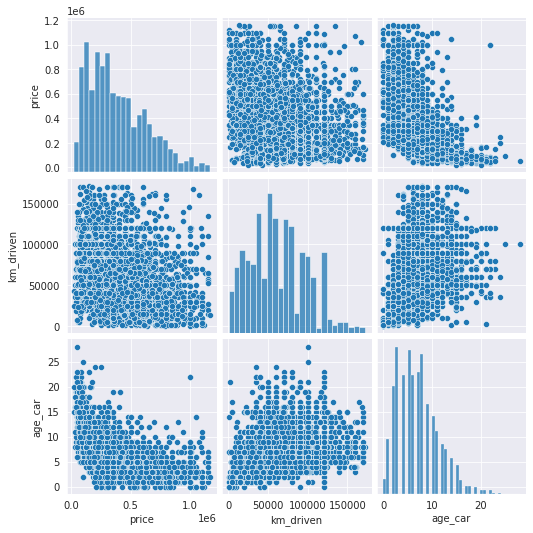

In [ ]:
sns.pairplot(df_cleaned);

In [ ]:
correlation = df_cleaned.corr()

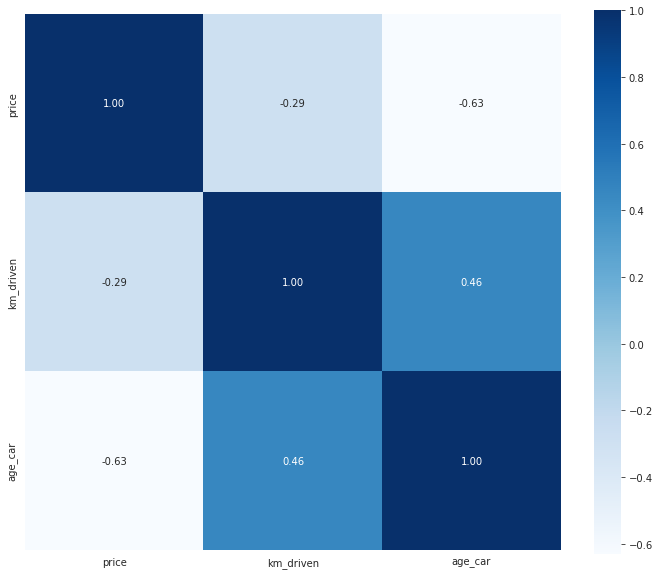

In [ ]:
#plot Heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws = {'size' : 10}, cmap = 'Blues');

# **Train Test Split**

In [ ]:
#Import tran_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X = df_stand.drop(["price"], axis = 1)
Y = df_stand["price"]

In [ ]:
print(X)
print(Y)

      km_driven   age_car  ...  owner_Test Drive Car  owner_Third Owner
0      0.192016  1.407981  ...             -0.059557          -0.269926
1     -0.360312  1.407981  ...             -0.059557          -0.269926
2      1.020508  0.225308  ...             -0.059557          -0.269926
3     -0.470778 -0.957365  ...             -0.059557          -0.269926
4      2.152781 -0.247761  ...             -0.059557          -0.269926
...         ...       ...  ...                   ...                ...
3956   0.468180 -0.247761  ...             -0.059557          -0.269926
3957   0.468180 -0.247761  ...             -0.059557          -0.269926
3958   0.551029  0.934912  ...             -0.059557          -0.269926
3959   0.744344 -0.720831  ...             -0.059557          -0.269926
3960  -0.636477 -0.720831  ...             -0.059557          -0.269926

[3961 rows x 46 columns]
0      -1.341447
1      -1.039630
2       0.831639
3      -0.576843
4       0.228004
          ...   
3956    

In [ ]:
#train_test_split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"Y_train : {Y_train.shape}")
print(f"Y_test : {Y_test.shape}")

X_train : (3168, 46)
X_test : (793, 46)
Y_train : (3168,)
Y_test : (793,)


# **Model Training**

In [ ]:
#Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
r2 = []
model = []
RMSE = []
MSE = []
reg = [LinearRegression(), Ridge(), Lasso()]
for tar in reg:
    model_name = type(tar).__name__
    tar.fit(X_train, Y_train)
    y_pred = tar.predict(X_test)
    r2.append(r2_score(Y_test, y_pred))
    model.append(model_name)
    RMSE.append(mean_squared_error(Y_test, y_pred, squared = False))
    MSE.append(mean_squared_error(Y_test, y_pred, squared = True))
model = pd.DataFrame({"Model" : model, "R2" : r2, "RMSE" : RMSE, "MSE" : MSE})
print(model)

              Model        R2      RMSE       MSE
0  LinearRegression  0.651673  0.576058  0.331843
1             Ridge  0.652217  0.575608  0.331325
2             Lasso -0.000774  0.976429  0.953413


# **LinearRegression plot**

In [ ]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
R2 = r2_score(Y_test, Y_pred)
RMSE = mean_squared_error(Y_test, Y_pred, squared = False)
MSE = mean_squared_error(Y_test, Y_pred, squared = True)

print(f"R2 SCORE : {R2}")
print("RMSE SCORE : {}".format(RMSE))
print(f"MSE SCORE : {MSE}")

R2 SCORE : 0.6516725586440764
RMSE SCORE : 0.5760580968023965
MSE SCORE : 0.3318429308915993


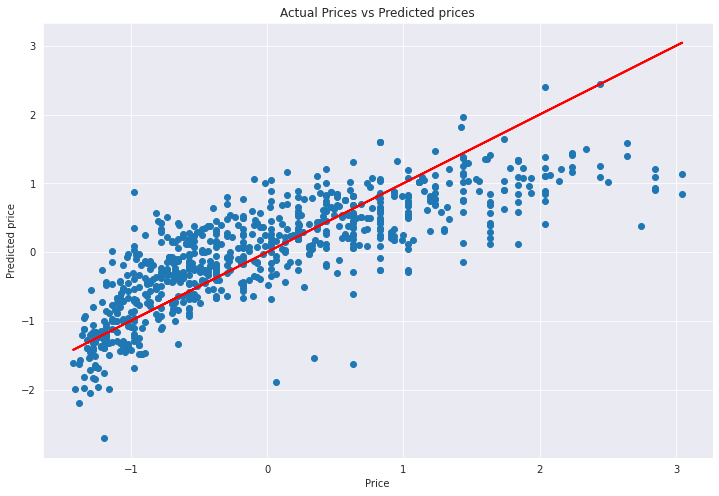

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(Y_test, Y_pred)
plt.plot(Y_test, Y_test,color='red', linewidth=2)
plt.xlabel("Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted prices")
plt.show()

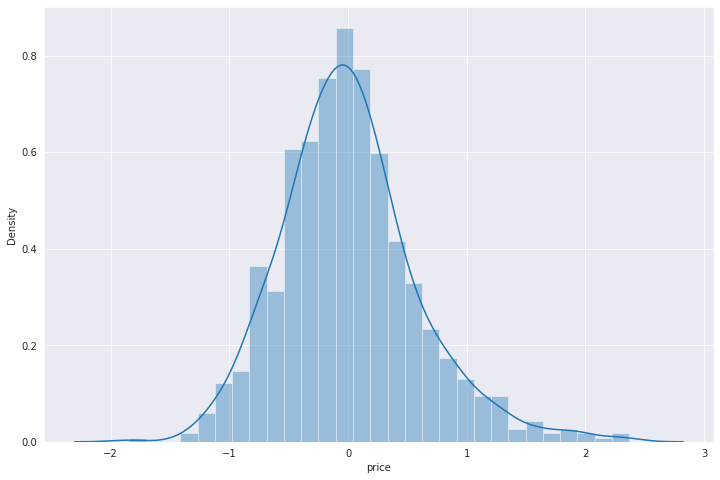

In [ ]:
plt.figure(figsize = (12, 8))
sns.distplot(Y_test - Y_pred);

# **RidgeRegression plot**

In [ ]:
ridge = Ridge()
ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
Y_pred_1 = ridge.predict(X_test)

In [ ]:
R2 = r2_score(Y_test, Y_pred)
RMSE = mean_squared_error(Y_test, Y_pred_1, squared = False)
MSE = mean_squared_error(Y_test, Y_pred_1, squared = True)

print(f"R2 SCORE : {R2}")
print("RMSE SCORE : {}".format(RMSE))
print(f"MSE SCORE : {MSE}")

R2 SCORE : 0.6516725586440764
RMSE SCORE : 0.5756080937688504
MSE SCORE : 0.3313246776122096


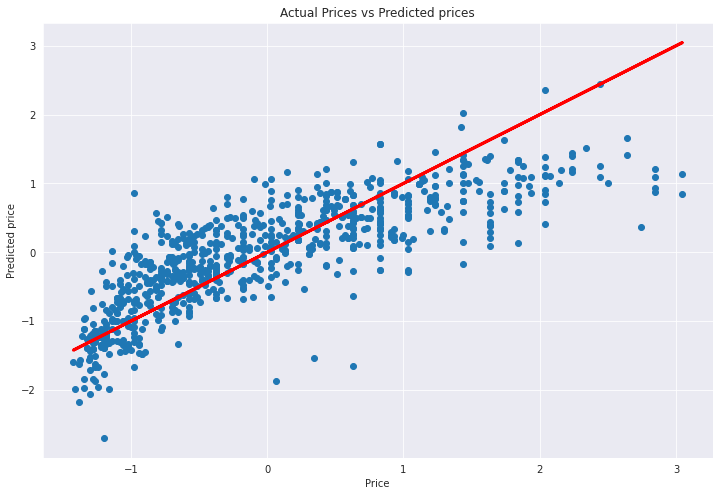

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(Y_test, Y_test,color='red', linewidth=3)
plt.scatter(Y_test, Y_pred_1)
plt.xlabel("Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted prices")
plt.show()